In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

In [2]:
import random


def calc_value(probability, ev):
    value = ev / probability
    return value


def get_result(probability):
    return 1 if random.random() < probability else 0


def gamble_machine(input_value, probability, FIXED_EV):
    if get_result(probability):
        return input_value * calc_value(probability, FIXED_EV)
    else:
        return 0


def do_test(samples, probability, ev, n):
    test_samples = samples.copy()
    for person, initial_money in test_samples.items():
        input_value = initial_money / n
        for _ in range(n):
            output_value = gamble_machine(input_value, probability, ev)
            initial_money -= input_value
            initial_money += output_value

        test_samples[person] = initial_money
    return test_samples


def calc_win_ratio(samples, initial_money):
    winners = sum(value >= initial_money for value in samples.values())
    totals = len(samples)
    return winners / totals

In [3]:
initial_money = 10000
samples = {idx: initial_money for idx in range(1, 1001)}

NameError: name 'ev' is not defined

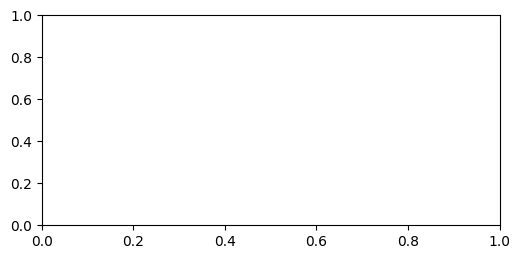

In [4]:
plt.figure(figsize=(13, 6))
for idx, p in enumerate([0.1, 0.2, 0.4, 0.5]):
    plt.subplot(2, 2, idx + 1)

    result_dict = dict()
    for n in range(1, 100 + 1):
        tested_samples = do_test(samples=samples, probability=p, ev=ev, n=n)
        result_dict[n] = calc_win_ratio(tested_samples, initial_money)

    plt.title(f"probability  : {p}")
    plt.scatter(result_dict.keys(), result_dict.values())
    plt.plot(result_dict.keys(), result_dict.values())
    plt.ylim([0, 1])
    plt.axhline(0.5, c="r")
plt.tight_layout()
plt.show()